**STEP 1: IMPORT LIBRARIES**

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

**STEP 2: LOAD DATA**

In [22]:
data = pd.read_csv('apple_stocks.csv')

In [23]:
data.head()

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


In [24]:
data['Date'] = pd.to_datetime(data['Date'])

/tmp/ipython-input-1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [25]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-07-07,142.90,144.75,142.90,144.18,19201712
1,2017-07-06,143.02,143.50,142.41,142.73,24128782
2,2017-07-05,143.69,144.79,142.72,144.09,21569557
3,2017-07-03,144.88,145.30,143.10,143.50,14277848
4,2017-06-30,144.45,144.96,143.78,144.02,23024107


**STEP 3: DATA PREPROCESSING**

In [26]:
print(data.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [27]:
data['Daily_Return'] = data['Close'].pct_change()

In [28]:
data.head()

,Date,Open,High,Low,Close,Volume,Daily_Return
0,2017-07-07,142.90,144.75,142.90,144.18,19201712,NaN
1,2017-07-06,143.02,143.50,142.41,142.73,24128782,-0.010057
2,2017-07-05,143.69,144.79,142.72,144.09,21569557,0.009528
3,2017-07-03,144.88,145.30,143.10,143.50,14277848,-0.004095
4,2017-06-30,144.45,144.96,143.78,144.02,23024107,0.003624


In [29]:
data.dropna(inplace=True)

In [30]:
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

In [31]:
data.head()

,Date,Open,High,Low,Close,Volume,Daily_Return,Target
1,2017-07-06,143.02,143.50,142.41,142.73,24128782,-0.010057,1
2,2017-07-05,143.69,144.79,142.72,144.09,21569557,0.009528,0
3,2017-07-03,144.88,145.30,143.10,143.50,14277848,-0.004095,1
4,2017-06-30,144.45,144.96,143.78,144.02,23024107,0.003624,0
5,2017-06-29,144.71,145.13,142.28,143.68,31499368,-0.002361,1


In [32]:
data.dropna(inplace=True)

In [33]:
data.head()

,Date,Open,High,Low,Close,Volume,Daily_Return,Target
1,2017-07-06,143.02,143.50,142.41,142.73,24128782,-0.010057,1
2,2017-07-05,143.69,144.79,142.72,144.09,21569557,0.009528,0
3,2017-07-03,144.88,145.30,143.10,143.50,14277848,-0.004095,1
4,2017-06-30,144.45,144.96,143.78,144.02,23024107,0.003624,0
5,2017-06-29,144.71,145.13,142.28,143.68,31499368,-0.002361,1


**STEP 4: FEATURES & TARGET SPLIT**

In [34]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']
X = data[features]
y = data['Target']

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, shuffle=False)

**STEP 5: RANDOM FOREST CLASSIFIER**

In [35]:
rf = RandomForestClassifier(random_state=42)

**STEP 6: HYPERPARAMETER TUNING WITH GRIDSEARCHCV**

In [41]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                        cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


**STEP 7: TRAIN FINAL MODEL**

In [42]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=42)

**STEP 8: PREDICTION & EVALUATION**

In [44]:
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6538461538461539
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        17
           1       0.00      0.00      0.00         9

    accuracy                           0.65        26
   macro avg       0.33      0.50      0.40        26
weighted avg       0.43      0.65      0.52        26

Confusion Matrix:
 [[17  0]
 [ 9  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**STEP 9: ROC CURVE & AUC**

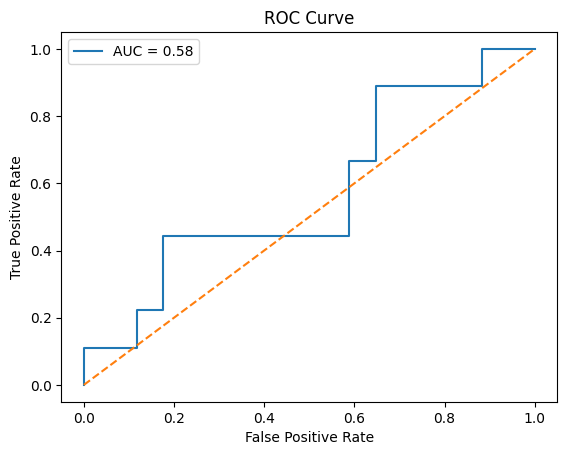

In [47]:
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC = %.2f" % auc_score)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()